In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [7]:
df = pd.read_csv('Per_Game_Stats.csv')
df = df[(df['Year'] >= 2010) & (df['Year'] <= 2019)]
corr_df = df[['3PM Per Game', 'FTM Per Game', 
       'TRB Per Game', 'AST Per Game', 'STL Per Game',
       'BLK Per Game', 'TOV Per Game', 'PF Per Game']]
abs(corr_df.corr())>=0.5


,3PM Per Game,FTM Per Game,TRB Per Game,AST Per Game,STL Per Game,BLK Per Game,TOV Per Game,PF Per Game
3PM Per Game,True,False,False,False,False,False,False,False
FTM Per Game,False,True,False,False,False,False,False,False
TRB Per Game,False,False,True,False,False,False,False,False
AST Per Game,False,False,False,True,False,False,False,False
STL Per Game,False,False,False,False,True,False,False,False
BLK Per Game,False,False,False,False,False,True,False,False
TOV Per Game,False,False,False,False,False,False,True,False
PF Per Game,False,False,False,False,False,False,False,True


In [8]:
df = df[df['Tournament App?'] == 1]
df['School'] = df['School'].str[:-5]
df

,Unnamed: 0,School,Games Played,Wins,Losses,W-L%,Simple Rating System,Strength of Schedule,Conf. Wins,Conf. Losses,...,3PA Per Game,FTM Per Game,FTA Per Game,ORB Per Game,TRB Per Game,AST Per Game,STL Per Game,BLK Per Game,TOV Per Game,PF Per Game
4540,4540,Arkansas-Pine Bluff,34,18,16,0.529,-8.29,-7.68,14.0,4.0,...,13.705882,16.911765,25.323529,12.411765,37.823529,12.382353,6.735294,3.558824,16.735294,22.470588
4545,4545,Baylor,36,28,8,0.778,17.97,8.03,11.0,5.0,...,18.388889,14.722222,20.305556,12.305556,39.111111,14.111111,6.583333,6.722222,13.638889,17.750000
4554,4554,Brigham Young,36,30,6,0.833,18.82,3.00,13.0,3.0,...,19.444444,18.055556,22.861111,10.194444,37.000000,15.750000,8.527778,3.500000,11.583333,17.250000
4559,4559,Butler,38,33,5,0.868,14.37,5.08,18.0,0.0,...,20.026316,17.394737,23.578947,9.289474,32.657895,12.210526,7.026316,2.263158,12.000000,18.026316
4564,4564,California,35,24,11,0.686,17.29,8.26,13.0,5.0,...,17.400000,15.514286,20.485714,11.285714,35.457143,14.285714,5.657143,2.457143,12.028571,16.942857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7998,7998,Virginia Tech,35,26,9,0.743,19.28,7.79,12.0,6.0,...,23.742857,13.171429,17.314286,8.857143,32.628571,15.171429,6.742857,2.228571,11.200000,15.200000
8001,8001,Washington,36,27,9,0.750,12.01,7.01,15.0,3.0,...,21.666667,13.111111,18.861111,9.277778,31.361111,11.638889,8.972222,5.722222,13.305556,18.138889
8012,8012,Wisconsin,34,23,11,0.676,17.90,11.01,14.0,6.0,...,19.764706,10.117647,15.617647,8.323529,35.205882,12.647059,5.205882,4.117647,9.617647,15.029412
8013,8013,Wofford,35,30,5,0.857,13.92,0.80,18.0,0.0,...,26.542857,11.600000,16.485714,10.428571,35.200000,15.085714,6.657143,3.000000,10.771429,16.828571


In [9]:
df_tournament_perf = pd.read_csv("C:\\Users\\pghme\\OneDrive\\Documentos\\_Duke\\Classes\\7th Semester - Fall 24\\ECE 583\\cs-526-ncaa\\data\\mtourney_results_processed.csv")
df_tournament_perf.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WSeasonTeamID,LSeasonTeamID,WTeamName,LTeamName,WSeedRaw,LSeedRaw,WSeed,LSeed,Round
0,1985,136,1116,63,1234,54,N,0,1985_1116,1985_1234,Arkansas,Iowa,X09,X08,9,8,1.0
1,1985,136,1120,59,1345,58,N,0,1985_1120,1985_1345,Auburn,Purdue,Z11,Z06,11,6,1.0
2,1985,136,1207,68,1250,43,N,0,1985_1207,1985_1250,Georgetown,Lehigh,W01,W16,1,16,1.0
3,1985,136,1229,58,1425,55,N,0,1985_1229,1985_1425,Illinois St,USC,Y09,Y08,9,8,1.0
4,1985,136,1242,49,1325,38,N,0,1985_1242,1985_1325,Kansas,Ohio,Z03,Z14,3,14,1.0


In [10]:
df_tournament_perf = df_tournament_perf[(df_tournament_perf['Season'] >= 2010) & (df_tournament_perf['Season'] <= 2019)]
df_tournament_perf = df_tournament_perf[['Season', 'WTeamName', 'Round']]

lastest_round = df_tournament_perf.groupby(['Season', 'WTeamName'])['Round'].max().reset_index()
lastest_round

,Season,WTeamName,Round
0,2010,BYU,1.0
1,2010,Baylor,3.0
2,2010,Butler,5.0
3,2010,California,1.0
4,2010,Cornell,2.0
...,...,...,...
315,2019,Villanova,1.0
316,2019,Virginia,6.0
317,2019,Virginia Tech,2.0
318,2019,Washington,1.0


In [11]:
df = pd.merge(df, lastest_round, left_on=['Year', 'School'], right_on=['Season', 'WTeamName'], how='left').drop(columns=['Season', 'WTeamName'])
df['Round'] = df['Round'].fillna(0.0)
df = df.dropna()

In [12]:
df['Round'].value_counts()

Round
0.0    427
1.0    119
2.0     63
3.0     35
4.0     13
5.0     10
6.0     10
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df[['3PM Per Game', 'FTM Per Game', 
       'TRB Per Game', 'AST Per Game', 'STL Per Game',
       'BLK Per Game', 'TOV Per Game', 'PF Per Game']], df['Round'], test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight={0.0: 1, 1.0: 2, 2.0: 4, 3.0:8, 4.0:16, 5.0:32, 6.0:1e9})
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = indices[:3]

print("Random Forest w/ All Pred: {:.2f}%".format(100*rf.score(X_test, y_test)))
rf_top3 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight={0.0: 1, 1.0: 2, 2.0: 4, 3.0:8, 4.0:16, 5.0:32, 6.0:1e9})
rf_top3.fit(X_train.iloc[:, top_features], y_train)
print("Random Forest w/ 3 Most Relevant Pred: {:.2f}%".format(100*rf_top3.score(X_test.iloc[:, top_features], y_test)))
print(X_train.columns[top_features[0]], X_train.columns[top_features[1]], X_train.columns[top_features[2]])
print("------------------------------------------------------------------------------------")

y_pred_all = rf.predict(X_test)
y_pred_top3 = rf_top3.predict(X_test.iloc[:, top_features])

print("Confusion Matrix for Full Feature Model:")
print(confusion_matrix(y_test, y_pred_all))
print("Confusion Matrix for Top 3 Features Model:")
print("------------------------------------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_top3))
print(classification_report(y_test, y_pred_all))
print("------------------------------------------------------------------------------------")
print(classification_report(y_test, y_pred_top3))

Random Forest w/ All Pred: 63.24%
Random Forest w/ 3 Most Relevant Pred: 61.76%
TOV Per Game TRB Per Game BLK Per Game
------------------------------------------------------------------------------------
Confusion Matrix for Full Feature Model:
[[84  3  0  0  0  0  2]
 [18  1  0  0  0  0  1]
 [ 8  1  0  0  0  0  5]
 [ 8  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1]
 [ 2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1]]
Confusion Matrix for Top 3 Features Model:
------------------------------------------------------------------------------------
[[81  4  3  0  1  0  0]
 [18  1  1  0  0  0  0]
 [11  1  2  0  0  0  0]
 [ 6  2  0  0  0  0  0]
 [ 1  1  0  0  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.69      0.94      0.80        89
         1.0       0.20      0.05      0.08        20
         2.0       0.00      0.00      0.00        14
         3.0       0.00      0.00      0.00         8
         4.0      

c:\Users\pghme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pghme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\pghme\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

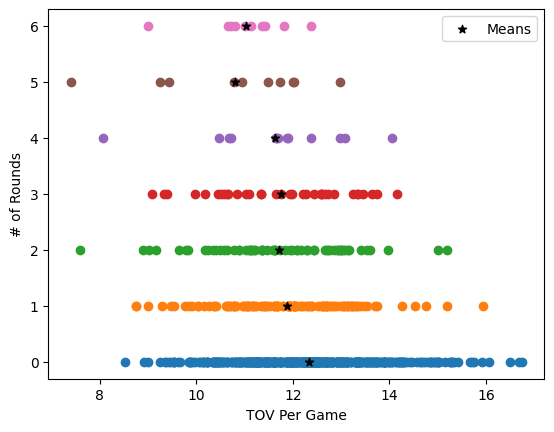

In [23]:
fig, ax = plt.subplots(1,1)
for k in range(0, 7):
    x = df[df['Round'] == k]['TOV Per Game'].to_numpy()
    x_avg = x.mean()
    y = df[df['Round'] == k]['Round'].to_numpy()
    ax.scatter(x, y)
    if k == 1:
        ax.scatter([x_avg], [k], marker='*', c='black', label='Means')
    else:
        ax.scatter([x_avg], [k], marker='*', c='black')
ax.set_xlabel('TOV Per Game')
ax.set_ylabel('# of Rounds')
plt.legend()
plt.show()